## Import tools

In [1]:
import csv
import random
import numpy as np
import pandas as pd
import seaborn as sns
from copy import deepcopy
from graphviz import Digraph
import matplotlib.pyplot as plt

# Load, Preprocess and Analyze Data

## Convert .dat to .csv

In [2]:
col_names = ['age', 'sex', 'chest_pain', 'resting_bp', 
             'serum_chol', 'blood_sugar', 'rest_ecg', 
             'max_heart_rate', 'induced_ang', 'oldpeak', 
             'peak_st_seg', 'major_vessels', 'thal', 'target']

In [3]:
def convert_to_csv(initial, final):
    with open(initial, 'r') as f:
        data = f.readlines()
    
    for i, r in enumerate(data):
        data[i] = data[i].replace(' ', ',')
    new_data = []
    
    for i, r in enumerate(data):
        row = data[i].split(',')
        row[-1] = row[-1][0]
        new_data.append(row)
    
    with open(final, 'w', newline='') as writeFile:
        writer = csv.writer(writeFile)
        writer.writerow(col_names)
        for r in new_data:
            writer.writerow(r)

In [4]:
convert_to_csv('heart.dat', 'heart.csv')

## Read Data

In [5]:
data = pd.read_csv("heart.csv")
attributes = ['age', 'sex', 'chest_pain', 'resting_bp', 
             'serum_chol', 'blood_sugar', 'rest_ecg', 
             'max_heart_rate', 'induced_ang', 'oldpeak', 
             'peak_st_seg', 'major_vessels', 'thal']

In [6]:
print("Shape of dataset: ")
data.shape

Shape of dataset: 


(270, 14)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             270 non-null    float64
 1   sex             270 non-null    float64
 2   chest_pain      270 non-null    float64
 3   resting_bp      270 non-null    float64
 4   serum_chol      270 non-null    float64
 5   blood_sugar     270 non-null    float64
 6   rest_ecg        270 non-null    float64
 7   max_heart_rate  270 non-null    float64
 8   induced_ang     270 non-null    float64
 9   oldpeak         270 non-null    float64
 10  peak_st_seg     270 non-null    float64
 11  major_vessels   270 non-null    float64
 12  thal            270 non-null    float64
 13  target          270 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 29.7 KB


In [8]:
data.describe()

,age,sex,chest_pain,resting_bp,serum_chol,blood_sugar,rest_ecg,max_heart_rate,induced_ang,oldpeak,peak_st_seg,major_vessels,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [9]:
data.head()

,age,sex,chest_pain,resting_bp,serum_chol,blood_sugar,rest_ecg,max_heart_rate,induced_ang,oldpeak,peak_st_seg,major_vessels,thal,target
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


## Analyze Attribute Behaviours

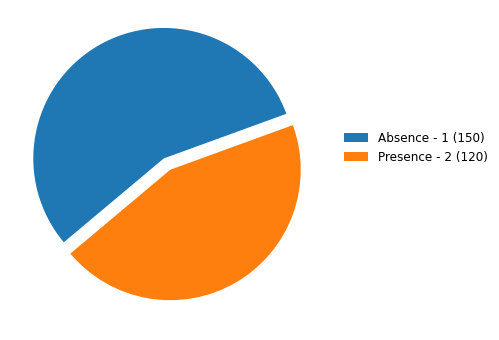

In [10]:
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw=dict(aspect="equal"))
labels = data.target.value_counts()
plt.pie(labels, explode = [0.1,0], startangle=20)
labels = [f'Absence - 1 ({labels[1]})',f'Presence - 2 ({labels[2]})']
ax.legend(labels=labels, frameon=False, bbox_to_anchor=(1,0.65), fontsize=12)
plt.savefig('target_count.png')
plt.show()

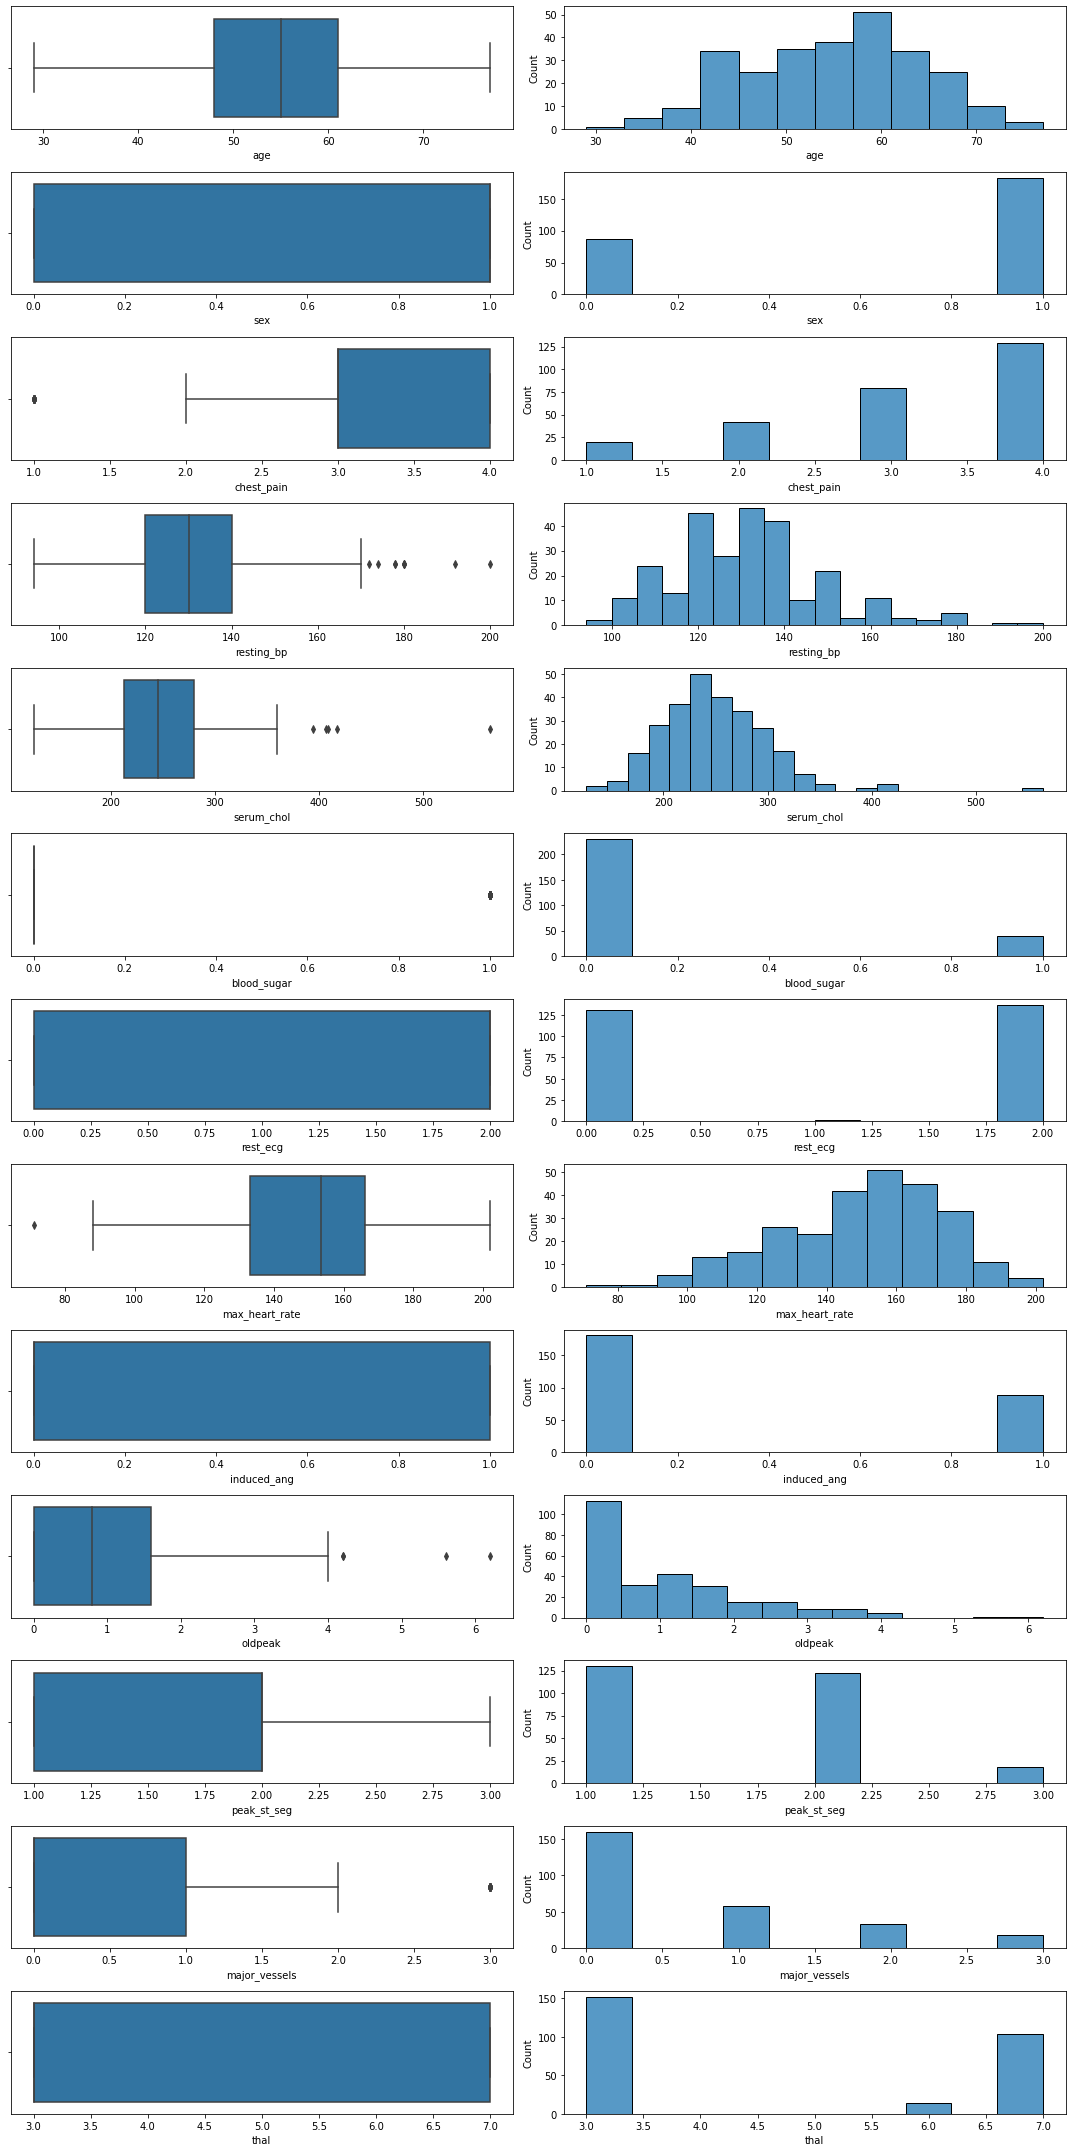

In [11]:
def cnt_attr_plot(df, columns):
    fig, ax = plt.subplots(len(columns), 2, figsize = (15, 30))
    for idx, column in enumerate(columns):
        sns.boxplot(x= df[column], ax = ax[idx,0])
        sns.histplot(df[column], ax = ax[idx,1])
    plt.tight_layout()
    plt.savefig('cnt_attr_plot.png')
cnt_attr_plot(data, attributes)

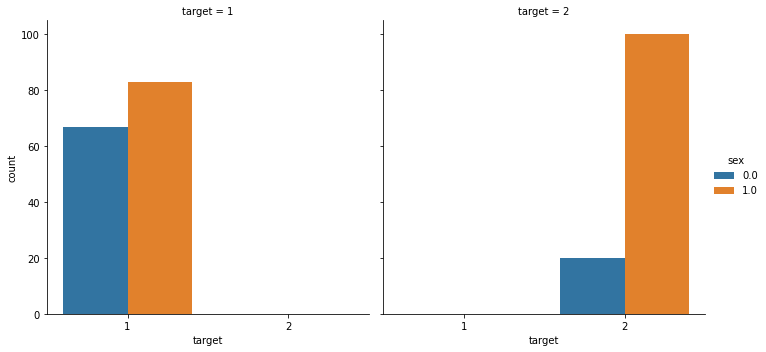

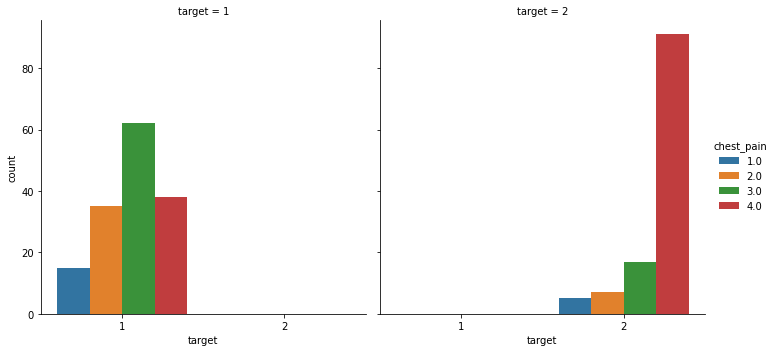

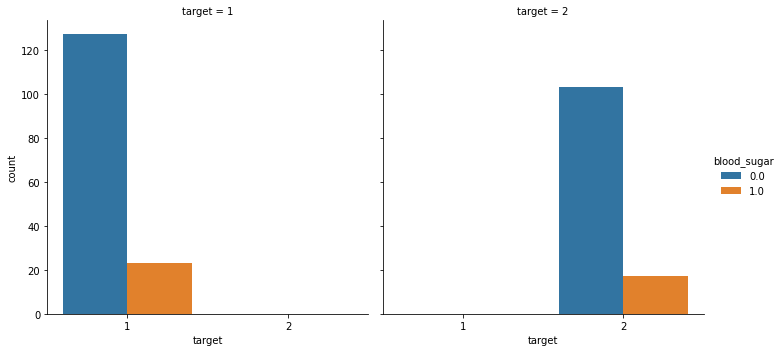

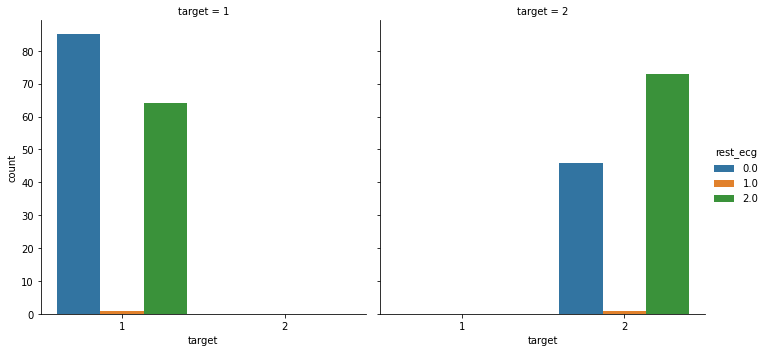

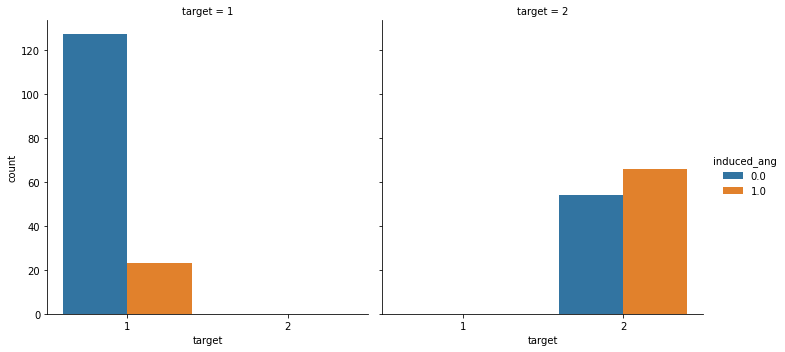

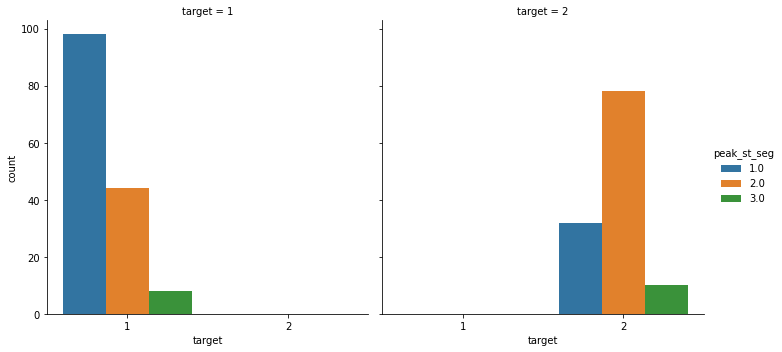

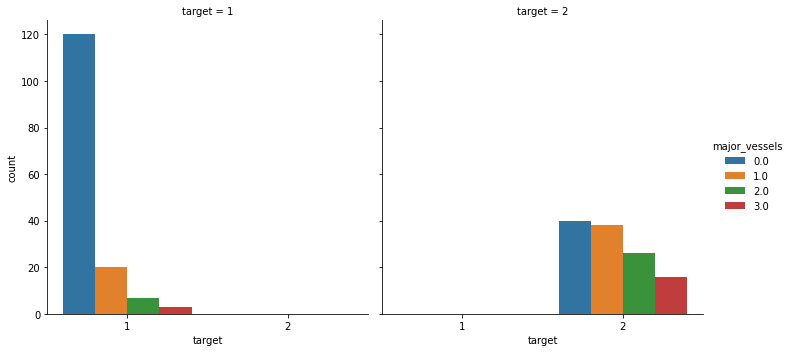

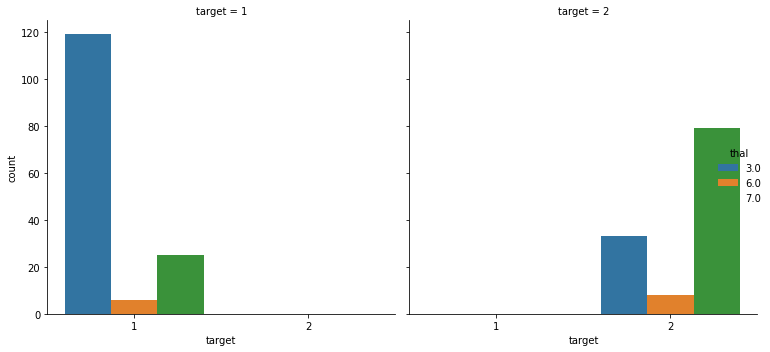

In [12]:
def cat_attr_plot(df, columns, target):
    for idx, column in enumerate(columns):
        sns.catplot(x ="target",hue=column, col="target",
                data= data , kind="count")
        plt.savefig(f'cat_attr_plot_{column}.png')
    plt.tight_layout()
    plt.show()
cat_attr_plot(data, ['sex', 'chest_pain', 'blood_sugar', 'rest_ecg', 'induced_ang', 'peak_st_seg', 'major_vessels', 'thal'], 'target')

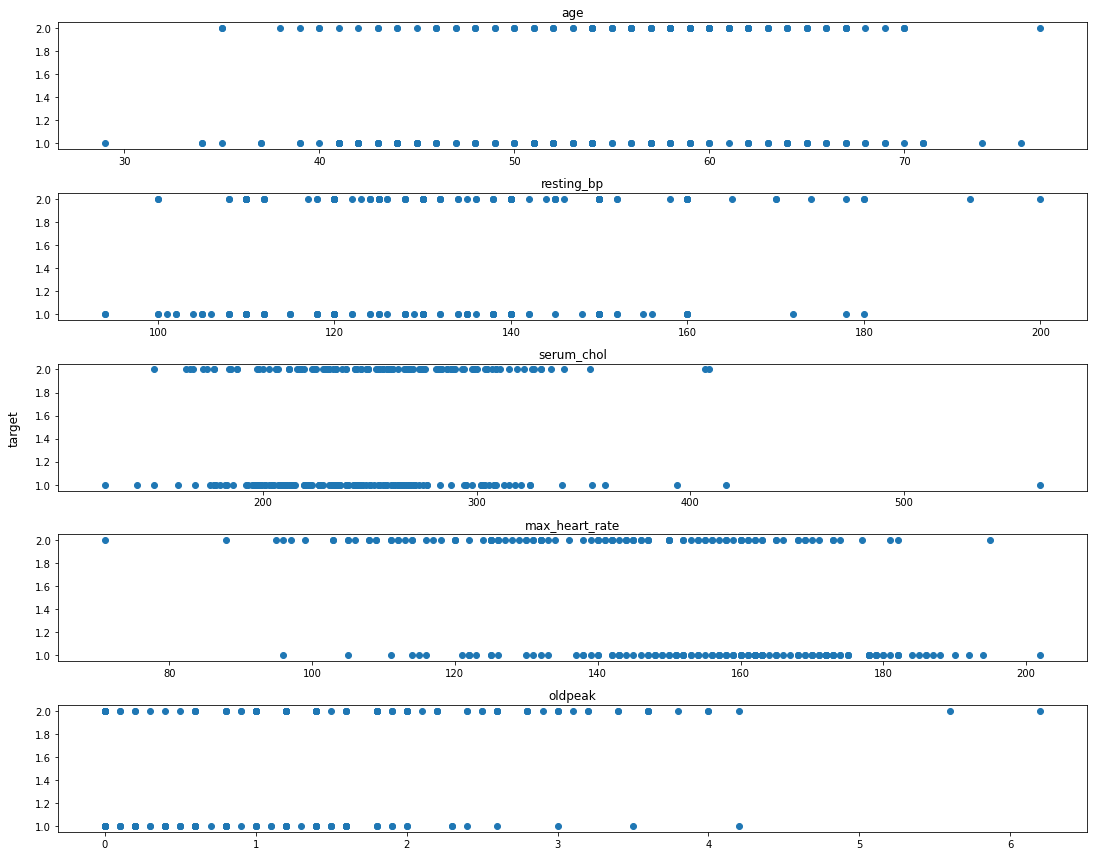

In [13]:
def cont_attr_plot(df, columns, target):
    fig, ax = plt.subplots(len(columns), figsize=(15,12))
    target_values = df[target].values
    for i, column in enumerate(columns):
        ax[i].scatter(df[column].values, target_values)
        ax[i].set_title(column)
    fig.text(-0.01, 0.5, target, va='center', rotation='vertical', fontsize = 12)
    plt.tight_layout()
    plt.savefig('cont_attr_plot.png')
    plt.show()
cont_attr_plot(data, ['age', 'resting_bp', 'serum_chol', 'max_heart_rate', 'oldpeak'], 'target')

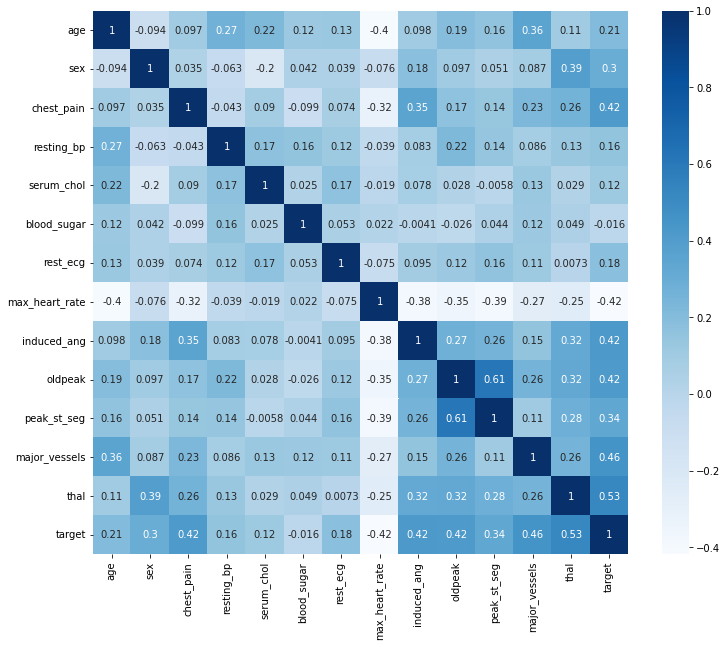

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),cmap=plt.cm.Blues, annot=True)
plt.savefig('heatmap.png')
plt.show()

In [15]:
categorical = ['sex', 'chest_pain', 'blood_sugar', 'rest_ecg', 'induced_ang', 'peak_st_seg', 'major_vessels', 'thal']
cat_index = [1, 2, 5, 6, 8, 10, 11, 12]
priority = {'thal':13, 'major_vessels':12, 'chest_pain':11, 'induced_ang':10, 
            'oldpeak':9, 'peak_st_seg':8, 'sex':7, 'age':6, 'rest_ecg':5, 
            'resting_bp':4, 'serum_chol':3, 'blood_sugar':2, 'max_heart_rate':1}

# Train-Test-Val Split

In [16]:
def split_train_test(test_size, random_state=0):
    """Shuffle and split the dataset

    Parameters
    ----------
    test_size : float
                The fraction of dataset to be used for testing
    
    random_state : int, default=0
                   Used as seed to generate reproducible splits
    
    Returns
    -------
    X_train : {array-like, sparse matrix}
              The training set attributes.
    
    Y_train : array-like
              The training set class labels.
    
    X_test  : {array-like, sparse matrix}
              The test set attributes.
    
    Y_test  : array-like
              The test set class labels.
    
    Notes
    -----
    X_train & Y_train, and X_test and Y_test has equal 
    no. of rows.
    """
    from sklearn.utils import shuffle
    df = shuffle(data)
    X = df.iloc[:, :-1].values
    Y = df.iloc[:, -1].values.reshape(-1,1)
    from sklearn.model_selection import train_test_split
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)
    return X_train, X_test, Y_train, Y_test

In [17]:
def split_train_val(X_train, Y_train, nval=1):
    """Split the training set for validation

    Parameters
    ----------
    X_train : {array-like, sparse matrix}
              The training set attributes.
    
    Y_train : array-like
              The training set class labels.
    
    nval : int, default=1
           No. of rows for validation set.
    
    Returns
    -------
    X_train : {array-like, sparse matrix}
              The training set attributes of decreased size.
    
    Y_train : array-like
              The training set class labels of decreased size.
    
    X_val : {array-like, sparse matrix}
            The validation set attributes of nval rows.
    
    Y_val : array-like
            The validation set class labels of nval rows.
    
    Notes
    -----
    X_train & Y_train, and X_val and Y_val has equal 
    no. of rows.
    """
    X_val = X_train[:nval]
    X_train = X_train[nval:]
    Y_val = Y_train[:nval]
    Y_train = Y_train[nval:]
    return X_train, X_val, Y_train, Y_val

# Node and Tree class

In [18]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, gain=None, gini=None, value=None):
        """Decision or Leaf Node for Decision Tree

        Parameters
        ----------
        feature_index : int
                        Index of the feature used for deciding
        
        threshold : int or float
                    Maximum or Equal threshold used for the feature
        
        left : Node
               The left child of the current node
        
        right : Node
                The right child of the current node
        
        gain : float
               Information Gain or Negative Gini Index
               corresponding to feature_index for threshold
        
        gini : float
               Gini Index corresponding to feature_index for threshold
               Is None if Information Gain is used
        
        value : int
                The value at the current leaf node
                Used mostly for a leaf node
        """
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.gain = gain
        self.gini = gini
        self.value = value

In [19]:
class DecisionTreeClassifier():
    """A decision tree classifier

    Parameters
    ----------
    criterion :  {"gini", "ig"}, default="gini"
        The function to measure the quality of a split. Supported criteria are
        "gini" for the Gini impurity and "ig" for the information gain.
    
    max_depth : int, default=None
        The maximum depth of the tree. If None, the nodes are expanded until
        all leaves are pure or until all leaves contain less than
        min_samples_split samples.
    
    min_samples_split : int, default=4
        The minimum number of samples required to split an internal node.
    
    Attributes
    ----------
    root : Node
           The root node of the decision tree

    Notes
    -----
    The parameters ``max_depth`` and ``min_samples_leaf`` control
    the size of the decision trees

    The default values for the parameters controlling the size of 
    the trees might lead to fully grown and unpruned trees.

    """
    def __init__(self, min_samples_split=4, max_depth=None, criterion="gini"):
        self.root = None
        self.max_depth = max_depth if max_depth is not None else 1000000007
        self.min_samples_split = min_samples_split
        self.criterion = criterion
    
    def fit(self, X, Y):
        """Build a decision tree classifier from the training set (X, Y).

        Parameters
        ----------
        X : {array-like, sparse matrix} of shape (n_samples_, n_features_)
            The training input samples.
        
        Y : array-like of shape (n_samples_,)
            The target values (class labels) as integers.
        
        Returns
        -------
        self.root : Root node of DecisionTreeClassifier
                    Fitted (trained) estimator.
        """
        data = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(data)
        return self.root
    
    def predict(self, X):
        """Predict target values for the set X

        Parameters
        ----------
        X : {array-like, sparse matrix} of shape (n_samples_, n_features_)
            The test input samples.
        
        Returns
        -------
        predictions : list of size n_samples_
                      The predicted target values of the input samples
        """
        
        predictions = [self.make_prediction(x, self.root) for x in X]
        return predictions

    def build_tree(self, data, curr_depth=0):
        """Build a decision tree from the training set 'data'.

        Parameters
        ----------
        data : {array-like, sparse matrix} of shape (n_samples_, n_features_+1)
               The training input samples with appended target values.
        
        curr_depth : int, default=0
                     The current depth of the tree. Takes the value
                     zero by default, i.e., tree is starting to be built
        
        Returns
        -------
        self.root : Node
                    The root node of the Decision Tree
                    Fitted estimator.
        
        Notes
        -----
        The function works recursively until stopping conditions are met.
        It finds the best split, calls itself with data for left and right 
        node and adds a decision node if the best split has a positive IG.

        If no more decision nodes are needed for the tree, 
        """
        X, Y = data[:, :-1], data[:, -1]
        n_samples_, n_features_ = np.shape(X)
        
        if n_samples_ >= self.min_samples_split and curr_depth <= self.max_depth:
            best_split = self.find_best_split(data, n_samples_, n_features_)
            if best_split["gain"] > 0 or best_split["gini"] is not None:
                left_subtree = self.build_tree(best_split["data_left"], curr_depth+1)
                right_subtree = self.build_tree(best_split["data_right"], curr_depth+1)
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["gain"], best_split["gini"])
        
        leaf_value_ = self.leaf_value(Y)
        return Node(value=leaf_value_)
    
    def find_best_split(self, data, n_samples_, n_features_):
        """Find best split among the features

        Parameters
        ----------
        data : {array-like, sparse matrix} of shape (n_samples_, n_features_+1)
               The training input samples with appended target values.
        
        n_samples_ : int
                     Number of samples in data
        
        n_samples_ : int
                     Number of features in data
        
        Returns
        -------
        best_spit : dict
                    The dictionary with keys "gain", "feature_index", "threshold", "data_left", "data_right"
        """
        best_split = {}
        max_gain = -float('inf')
        
        for fi in range(n_features_):
            feature_values = data[:, fi]
            potential_thresholds = np.unique(feature_values)
            for threshold in potential_thresholds:
                data_left, data_right = self.split(data, fi, threshold)
                if len(data_left) > 0 and len(data_right) > 0:
                    curr_gain = None
                    y = data[:, -1]
                    left_y = data_left[:, -1]
                    right_y = data_right[:, -1]
                    if self.criterion == "gini":
                        curr_gain = self.gini_gain(y)
                    else:
                        curr_gain = self.information_gain(y, left_y, right_y)
                    curr_gain = round(curr_gain, 5)
                    if (curr_gain > max_gain) or (curr_gain == max_gain and 
                        priority[col_names[fi]] > priority[col_names[best_split["feature_index"]]]):
                        max_gain = curr_gain
                        best_split["feature_index"] = fi
                        best_split["threshold"] = threshold
                        best_split["data_left"] = data_left
                        best_split["data_right"] = data_right
                        best_split["gain"] = curr_gain
                        best_split["gini"] = -curr_gain if self.criterion=="gini" else None
                        
        return best_split
    
    def split(self, data, feature_index, threshold):
        ''' function to split the data '''
        if feature_index in cat_index:
            data_left = np.array([row for row in data if row[feature_index]==threshold])
            data_right = np.array([row for row in data if row[feature_index]!=threshold])
        else:
            data_left = np.array([row for row in data if row[feature_index]<=threshold])
            data_right = np.array([row for row in data if row[feature_index]>threshold])
        return data_left, data_right
    
    def gini_gain(self, parent):
        """ Manipulated function for best split

        Parameters
        ----------
        parent : np-array
                 parent node data, along which gini gain is computed
        
        Returns
        -------
        gain : float
               Negative of Gini Index for the parent node data
        
        Notes
        -----
        No such concept called Gini Gain exists.
        For Information Gain, the one with highest value is used for splitting, 
        while for Gini Index, the one with lowest value is used. So, a 
        manipulated gini gain is used to generalize the condition for splitting.
        """
        gini = self.gini_index(parent)
        gain = -gini
        return gain

    def gini_index(self, Y):
        """Compute gini index for class labels in Y

        Parameters
        ----------
        Y : array-like
            The target values (class labels) at some node.
        
        Returns
        -------
        impurity : float
                   The gini impurity for 'Y'
        """
        class_labels = np.unique(Y)
        val = 0
        for cls in class_labels:
            p_cls = len(Y[Y == cls]) / len(Y)
            val += p_cls**2
        gini = 1 - val
        return gini
    
    def information_gain(self, parent, l_child, r_child):
        """ Compute Information Gain (IG) of a node

        Parameters
        ----------
        parent : np-array
                 parent node data, along which IG is computed
        
        l_child : np-array
                  left child node data
        
        r_child : np-array
                  right child node data
        
        Returns
        -------
        gain : float
               Information Gain for the parent node data
        """
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain
    
    def entropy(self, Y):
        """Compute entropy for class labels in Y

        Parameters
        ----------
        Y : array-like
            The target values (class labels) at some node.
        
        Returns
        -------
        entropy : float
                  The entropy for 'Y'
          """
        class_labels = np.unique(Y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(Y[Y == cls]) / len(Y)
            entropy += -(p_cls * np.log2(p_cls))
        return entropy
        
    def leaf_value(self, Y):
        """Compute the value for leaf node

        Parameters
        ----------
        Y : array-like
            The target values (class labels) at some node.
        
        Returns
        -------
        value : int
                The target class with maximum frequency
        """
        Y = list(Y)
        value = int(max(Y, key=Y.count))
        return value
    
    def print_tree(self, node=None, indent=" "):
        """Print the decison tree given the root node

        Parameters
        ----------
        node : Node
               The decision node is printed with suitable indentation
               and its child nodes are called
        
        indent : string, default=" "
                 Indentation to be given while printing the tree
                 Increases its length when called for child nodes
        """
        if not node:
            node = self.root

        if node.value is not None:
            print(node.value)

        else:
            if self.criterion == "gini":
                if node.feature_index in cat_index:
                    print(f"{col_names[node.feature_index]} == {node.threshold}  (Gini Index: {node.gini})")
                else:
                    print(f"{col_names[node.feature_index]} <= {node.threshold}  (Gini Index: {node.gini})")
            else:
                if node.feature_index in cat_index:
                    print(f"{col_names[node.feature_index]} == {node.threshold}  (Info Gain: {node.gain})")
                else:
                    print(f"{col_names[node.feature_index]} <= {node.threshold}  (Info Gain: {node.gain})")
            print("%s left: " % (indent), end="")
            self.print_tree(node.left, indent + " ")
            print("%sright: " % (indent), end="")
            self.print_tree(node.right, indent + " ")
    
    def make_prediction(self, x, node):
        """Predict target value for a single data point

        Parameters
        ----------
        x : sparse matrix of shape (1, n_features_)
            The test input sample.
        
        node : decision node
               The decision node is involved in making predictions
        
        Returns
        -------
        value : int
                The predicted target value of the input sample
        """
        
        if node.value != None:
            return node.value
        feature_val = x[node.feature_index]
        if node.feature_index in cat_index:
            if feature_val==node.threshold:
                return self.make_prediction(x, node.left)
            else:
                return self.make_prediction(x, node.right)
        else:
            if feature_val<=node.threshold:
                return self.make_prediction(x, node.left)
            else:
                return self.make_prediction(x, node.right)

# Utility Functions For Building Tree and Classification

In [20]:
def count_nodes(root, z=0):
    """The number of nodes in a tree
    
    Parameters
    ----------
    root : Node
           The root node of the tree
    
    z : int
        The no. of nodes passed till now
    
    Returns
    -------
    n : int
        The number of nodes in the tree
    
    Notes
    -----
    This function is recursive and it calls itself
    to calculate no. of nodes in its left and right
    sub-trees.
    """
    if root is None:
        return 0
    z1, z2 = 0, 0
    if root.left:
        z1 = count_nodes(root.left, 0)
    if root.right:
        z2 = count_nodes(root.right, 0)
    n = (1 + z1 + z2)
    return n

In [21]:
def accuracy_score(Y_true, Y_pred):
    """Accuracy classification score.

    In multilabel classification, this function computes subset accuracy:
    the set of labels predicted for a sample must *exactly* match the
    corresponding set of labels in Y_true.

    Parameters
    ----------
    Y_true : 1d array-like
             Ground truth labels
    
    Y_pred : 1d array-like
             Predicted labels, as returned by a classifier
    
    Returns
    -------
    score : float
            The fraction of correctly classified samples
            The value lies between 0 (worst) and 1 (best)
    
    Notes
    -----
    The function returns 0 if length of true and predicted
    arrays are unequal
    """
    if len(Y_true) != len(Y_pred):
        return 0
    c = 0
    for (i, j) in zip(Y_true, Y_pred):
        if i == j:
            c += 1
    score = (c / len(Y_true))
    return score

In [22]:
def plot_depth_graph(criterion, depths, avg_accuracies, best_accuracies):
    """Plot the Accuracy vs Depth Limit Graph
    """
    st = "Gini Index" if criterion=="gini" else "Information Gain"
    plt.rcParams['figure.figsize'] = (9,7)
    plt.plot(depths, avg_accuracies, label='Average')
    plt.plot(depths, best_accuracies, label='Best')
    plt.title(f'Accuracy vs Depth Limit for {st}', fontsize=14)
    plt.legend()
    plt.savefig(f'{criterion}_depth.png')
    plt.show()

In [23]:
def plot_acc_vs_nodes(criterion, n_nodes, accuracies):
    """Plot the Accuracy bs No. of Nodes Graph
    """
    st = "Gini Index" if criterion=="gini" else "Information Gain"
    n_nodes, accuracies = (list(t) for t in zip(*sorted(zip(n_nodes, accuracies))))
    plt.rcParams['figure.figsize'] = (12,8)
    plt.plot(n_nodes, accuracies)
    plt.ylim([0.4, 1])
    plt.title(f"Accuracy vs No. of Nodes for {st}", fontsize=14)
    plt.savefig(f'{criterion}_accuracy_vs_nodes.png')
    plt.show()

In [24]:
def find_best_depth_limit(criterion):
    """Compute accuracy for different depth limits

    The function computes average and best accuracy over 10 random
    80-20 splits for each depth limit in [1, 15].
    """
    depths = [x for x in range(1,16)]
    avg_accuracies = []
    best_accuracies = []
    all_accuracies = []
    n_nodes = []

    rs = []
    for i in range(10):
        rs.append(random.randint(0, 100))
    
    for depth in depths:
        accuracy = 0
        avg_accuracy = 0
        best_accuracy = 0
        for rts in rs:
            X_train, X_test, Y_train, Y_test = split_train_test(0.2, rts)
            classifier = DecisionTreeClassifier(max_depth=depth, criterion=criterion)
            rt = classifier.fit(X_train, Y_train)
            Y_pred = classifier.predict(X_test)
            accuracy = accuracy_score(Y_test, Y_pred)
            all_accuracies.append(accuracy)
            n_nodes.append(count_nodes(rt, 0))
            avg_accuracy += accuracy
            if accuracy>best_accuracy: best_accuracy = accuracy
        avg_accuracy /= 10
        avg_accuracies.append(avg_accuracy)
        best_accuracies.append(best_accuracy)
    
    plot_depth_graph(criterion, depths, avg_accuracies, best_accuracies)

    plot_acc_vs_nodes(criterion, n_nodes, all_accuracies)

In [25]:
def process_building(criterion="gini", max_depth=None):
    """Build the Decision Tree

    The function builds tree over 10 random 80-20 splits
    and returns the best tree classifier, root, and datasets.
    The 10 splits are used to build tree that give better results.
    """
    best_tree = None
    best_X_train = None
    best_X_test = None
    best_Y_train = None
    best_Y_test = None
    best_X_val = None
    best_Y_val = None
    best_Y_pred = None
    best_root = None
    max_accuracy = 0
    n_nodes = []
    accuracies = []

    rs = []
    for i in range(10):
        rs.append(random.randint(0, 100))
    
    for i in rs:
        X_train, X_test, Y_train, Y_test = split_train_test(0.2, i)
        X_train, X_val, Y_train, Y_val = split_train_val(X_train, Y_train, nval = 72)
        classifier = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion)
        rt = classifier.fit(X_train, Y_train)
        Y_pred = classifier.predict(X_test)
        accuracy = accuracy_score(Y_test, Y_pred)
        accuracies.append(accuracy)
        if accuracy > max_accuracy:
            max_accuracy = accuracy
            best_tree = classifier
            best_X_train = X_train
            best_X_test = X_test
            best_X_val = X_val
            best_Y_train = Y_train
            best_Y_test = Y_test
            best_Y_val = Y_val
            best_Y_pred = Y_pred
            best_root = rt
    
    Y_pred_val = classifier.predict(X_val)
    acc_val = accuracy_score(Y_val, Y_pred_val)
    print(f"\nValidation Accuracy before pruning:\t{acc_val}\n")

    st = "Gini Index" if criterion=="gini" else "Information Gain"
    print(f"\n   Best Test Accuracy for {st}:\t{max_accuracy}")
    print(f"\nAverage Test Accuracy for {st}:\t{sum(accuracies) / len(accuracies)}\n\n")

    classifier = best_tree
    root = best_root
    X_train = best_X_train
    X_val = best_X_val
    X_test = best_X_test
    Y_train = best_Y_train
    Y_val = best_Y_val
    Y_test = best_Y_test
    Y_pred = best_Y_pred

    return classifier, root, X_train, X_val, X_test, Y_train, Y_val, Y_test, Y_pred, acc_val

# Utility Functions For Post Pruning

In [26]:
def filter_data(X_train, Y_train, X_test, Y_test, node):
    """Split the dataset for left and right node

    The function split the dataset over a feature index
    based on a pre-computed threshold.
    """
    feature = node.feature_index
    thr = node.threshold
    X_train1, Y_train1, X_test1, Y_test1 = [], [], [], []
    X_train2, Y_train2, X_test2, Y_test2 = [], [], [], []
    for i in range(len(X_train)):
        if X_train[i][feature] <= thr:
            X_train1.append(X_train[i])
            Y_train1.append(Y_train[i])
        else:
            X_train2.append(X_train[i])
            Y_train2.append(Y_train[i])
    for i in range(len(X_test)):
        if X_test[i][feature] <= thr:
            X_test1.append(X_test[i])
            Y_test1.append(Y_test[i])
        else:
            X_test2.append(X_test[i])
            Y_test2.append(Y_test[i])
    
    return X_train1, Y_train1, X_test1, Y_test1, X_train2, Y_train2, X_test2, Y_test2

In [27]:
def leaf_node_value(y):
    """Determine value of the leaf node.
    """
    lst = []
    for i in y:
        lst.append(i[0])
    return max(lst, key=lst.count)

In [28]:
def decision_node_error(x, y, node, classifier):
    """Determine errors made on a node.

    The function returns the no. of erroneous predictions
    made on a decision node
    """
    if len(y) <= 0:
        return 0
    predictions = []
    for i in x:
        predictions.append(classifier.make_prediction(i, node))
    actual_values = y
    s = 0
    for i in range(len(predictions)):
        s += (predictions[i] != actual_values[i][0])
    return s

In [29]:
def pruning_node(node, X_train, Y_train, X_test, Y_test, classifier):
    """Prune a decision node.
    
    The function prunes a decision node if no. of errors
    made by it is more than that by replacing it with a 
    leaf node
    """
    if node is None:
        return node
    leaf = leaf_node_value(Y_train)
    errors_leaf = 0
    for i in Y_test:
        errors_leaf += (i != leaf)
    errors_decision_node = decision_node_error(X_test, Y_test, node, classifier)
    if errors_leaf < errors_decision_node:
        ln = Node(value=leaf)
        return ln
    return node

In [30]:
def post_pruning(node, X_train, Y_train, X_test, Y_test, classifier):
    """Prune the Decision Tree.

    The function is recursive and calls itself to prune the left
    and right subtrees of given node
    """
    lft = node.left
    rght = node.right

    # base case
    if node.left is None and node.right is None:
        return pruning_node(node, X_train, Y_train, X_test, Y_test, classifier)
        
    # recursive part
    else:
        X_train1, Y_train1, X_test1, Y_test1, X_train2, Y_train2, X_test2, Y_test2 = filter_data(X_train, Y_train, X_test, Y_test, node)
        if node.left is not None and node.left.feature_index is not None and len(X_train1)>0 and len(X_test1)>0:
            lft = post_pruning(node.left, X_train1, Y_train1, X_test1, Y_test1, classifier)
            
        if node.right is not None and node.right.feature_index is not None and len(X_train2)>0 and len(X_test2)>0:
            rght = post_pruning(node.right, X_train2, Y_train2, X_test2, Y_test2, classifier)
    
        node.left = lft
        node.right = rght

        return pruning_node(node, X_train, Y_train, X_test, Y_test, classifier)

In [31]:
def process_pruning(root, classifier, X_train, Y_train, X_val, Y_val, acc_val):
    """Utility function for pruning

    The function calls post_pruning() function to prune
    the tree, and prints before and after accuracy score
    of the validation set.
    """
    print(f"\nValidation Accuracy before pruning:\t{acc_val}\n")
    pruned_root = post_pruning(root, X_train, Y_train, X_val, Y_val, classifier)
    Y_pred_val_pruned = classifier.predict(X_val)
    print(f"\nValidation Accuracy after  pruning:\t{accuracy_score(Y_val, Y_pred_val_pruned)}\n")
    return pruned_root

# Utility Functions For Fancy Printing Tree

In [32]:
def get_child_node_value(node):
    """The value of child nodes.

    The function returns the value in left and 
    right child node of a decision node if it exists
    """
    v1 = None
    v2 = None
    if node.left != None and node.left.value != None: v1 = round(node.left.value)
    if node.right != None and node.right.value != None:  v2 = round(node.right.value)
    
    return v1, v2

In [33]:
def get(node, criterion):
    """Utility funcion for printing tree.

    This function processes the content of a node to 
    print it in a desired way
    """
    if criterion == "gini":
        ct = "Gini Index"
        x = round(node.gini, 4)
    else:
        ct = "IG"
        x = round(node.gain, 4)
    if node.value is not None:
        nv = round(node.value)
        return "Target = {}".format(nv)
    if col_names[node.feature_index] in categorical:
        comp = "=="
    else:
        comp = "<="
    v1, v2 = get_child_node_value(node)
    if v1 != None and v2 != None:
        return "{} {} {}\n{} = {}\nTrue Target = {}\nFalse Target = {}".format(col_names[node.feature_index], comp, node.threshold, ct, x, v1, v2)
    if v1 != None:
        return "{} {} {}\n{} = {}\nTrue Target = {}".format(col_names[node.feature_index], comp, node.threshold, ct, x, v1)
    if v1 != None and v2 != None:
        return "{} {} {}\n{} = {}\nFalse Target = {}".format(col_names[node.feature_index], comp, node.threshold, ct, x, v2)
    return "{} {} {}\n{} = {}".format(col_names[node.feature_index], comp, node.threshold, ct, x)    

In [34]:
def print_decision_tree(criterion, dtree, fn):
    """Print the Decision Tree

    The function creates a Top-Bottom Digraph with 
    rectangular-shaped nodes.
    Breadth First Search is implemented to add all the edges 
    in a queue in the output graph. The tree is then rendered 
    and saved as pdf.
    """
    f = Digraph('Decision Tree', filename='decision_tree.gv')
    f.attr(rankdir='TB', size='2000,1000', splines="false")
    f.attr('node', shape='rectangle')

    q = [dtree]
    while len(q) > 0:
        node = q.pop(0)
        if node.left != None and node.left.left!=None and node.left.right!=None:
            f.edge(get(node, criterion), get(node.left, criterion), label='True')
        if node.right != None and node.right.left!=None and node.right.right!=None:
            f.edge(get(node, criterion), get(node.right, criterion), label='False')

        if node.left != None:
            q.append(node.left)
        if node.right != None:
            q.append(node.right)

    f.render(fn, view=True)
    return f

# Gini Index

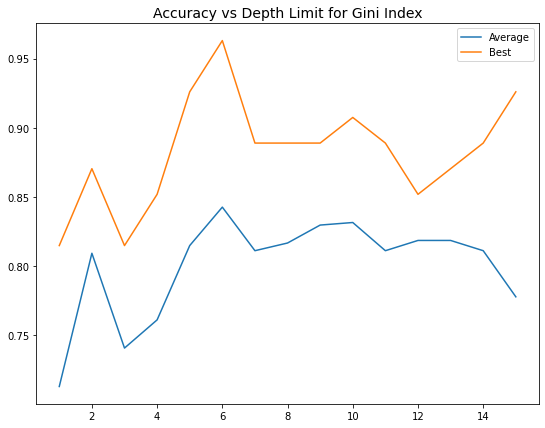

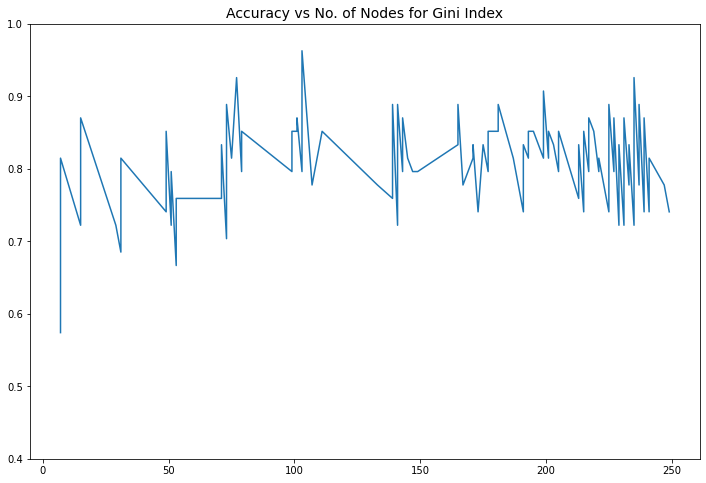

In [66]:
find_best_depth_limit('gini')

In [36]:
gini_classifier, gini_root, gini_X_train, gini_X_val, gini_X_test, gini_Y_train, gini_Y_val, gini_Y_test, gini_Y_pred, gini_acc_val = process_building(criterion='gini', max_depth=11)


Validation Accuracy before pruning:	0.8055555555555556


   Best Test Accuracy for Gini Index:	0.8333333333333334

Average Test Accuracy for Gini Index:	0.7925925925925925




In [37]:
gini_classifier.print_tree()

thal == 3.0  (Gini Index: 0.49913)
  left: major_vessels == 0.0  (Gini Index: 0.3473)
   left: chest_pain == 1.0  (Gini Index: 0.20414)
    left: 1
   right: chest_pain == 2.0  (Gini Index: 0.18)
     left: induced_ang == 0.0  (Gini Index: 0.0)
      left: oldpeak <= 0.0  (Gini Index: 0.0)
       left: peak_st_seg == 1.0  (Gini Index: 0.0)
        left: age <= 29.0  (Gini Index: 0.0)
         left: 1
        right: age <= 42.0  (Gini Index: 0.0)
          left: 1
         right: 1
       right: 1
      right: oldpeak <= 0.2  (Gini Index: 0.0)
        left: 1
       right: oldpeak <= 0.7  (Gini Index: 0.0)
         left: 1
        right: 1
     right: 1
    right: chest_pain == 3.0  (Gini Index: 0.22853)
      left: induced_ang == 0.0  (Gini Index: 0.28733)
       left: oldpeak <= 0.0  (Gini Index: 0.33241)
        left: sex == 0.0  (Gini Index: 0.29752)
         left: age <= 37.0  (Gini Index: 0.0)
          left: 1
         right: age <= 39.0  (Gini Index: 0.0)
           left: 1
    

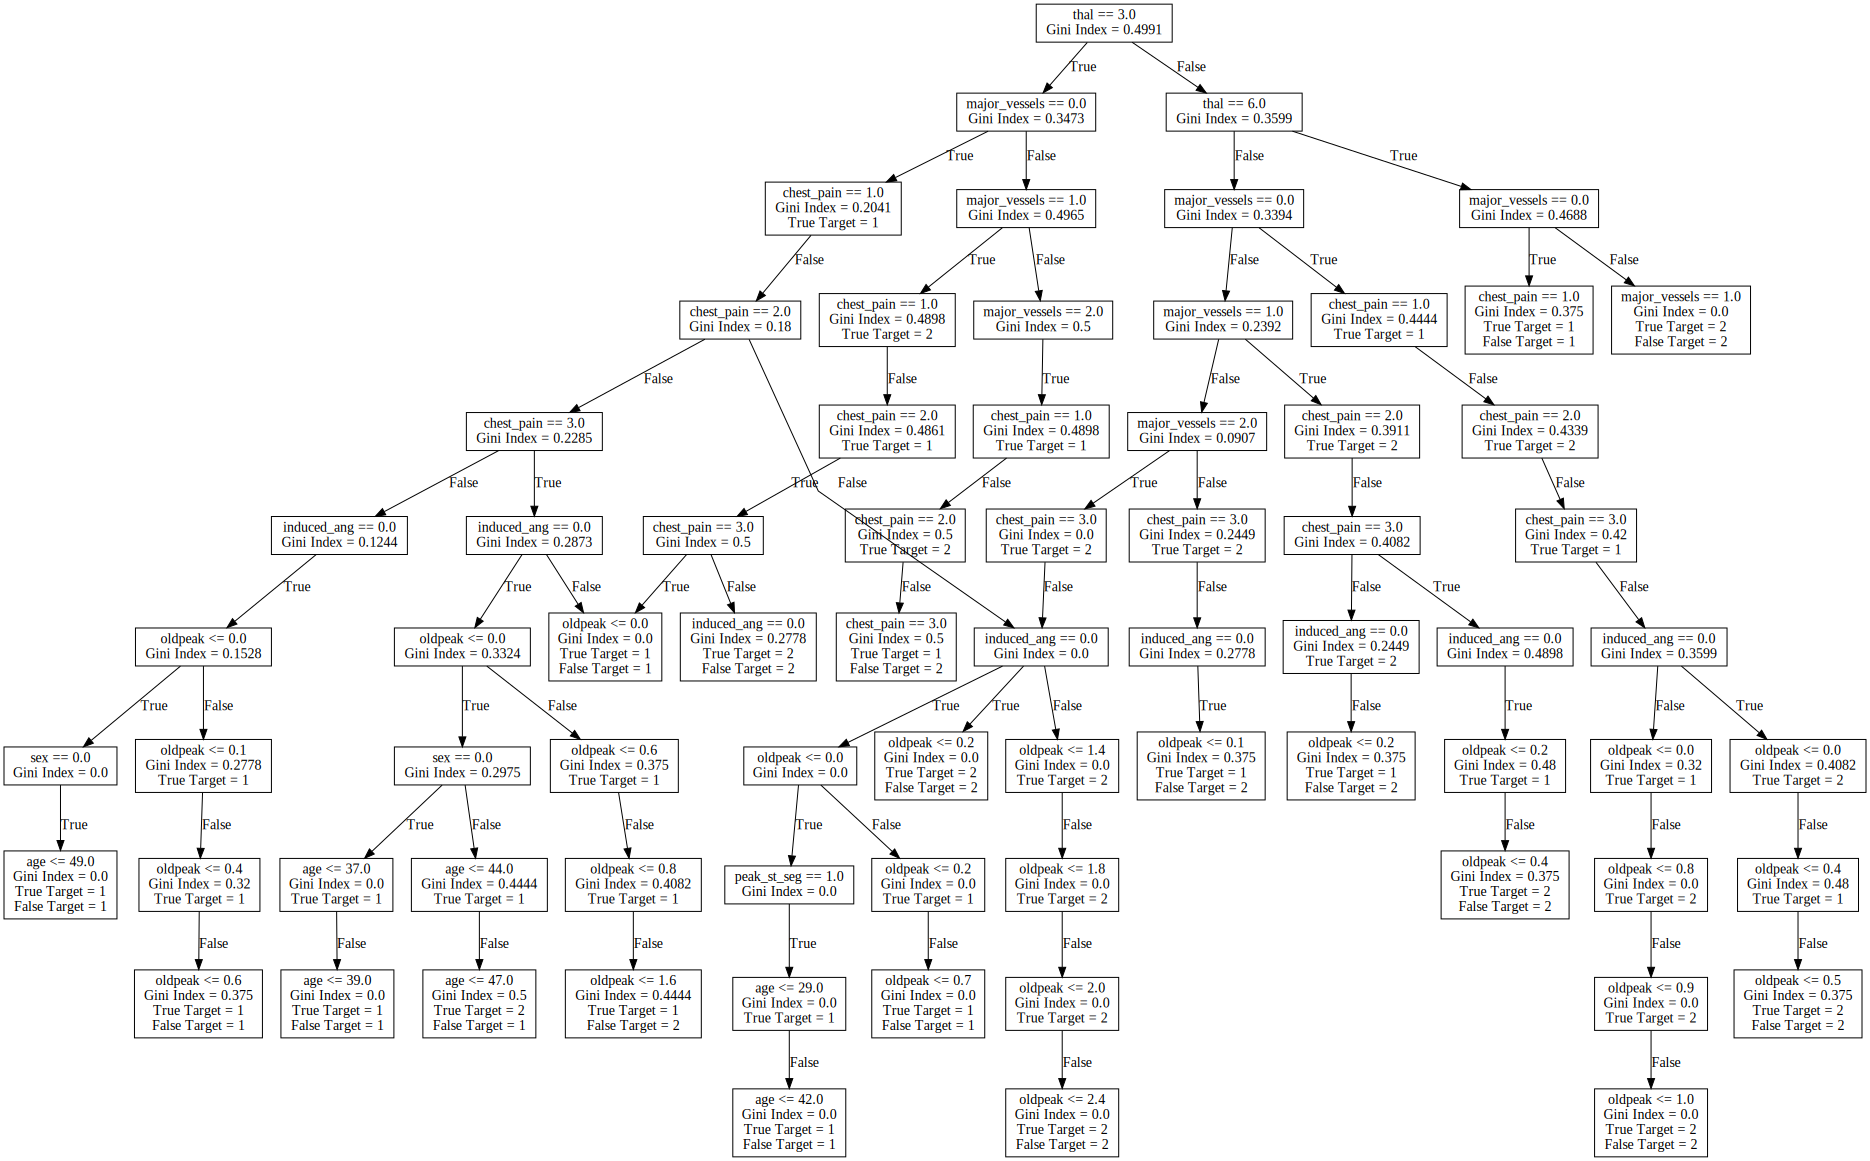

In [38]:
print_gini = print_decision_tree('gini', gini_root, 'gini_decision_tree.gv')
print_gini

In [39]:
print(f'Accuracy on test set: {accuracy_score(gini_Y_test, gini_Y_pred)}')

Accuracy on test set: 0.8333333333333334


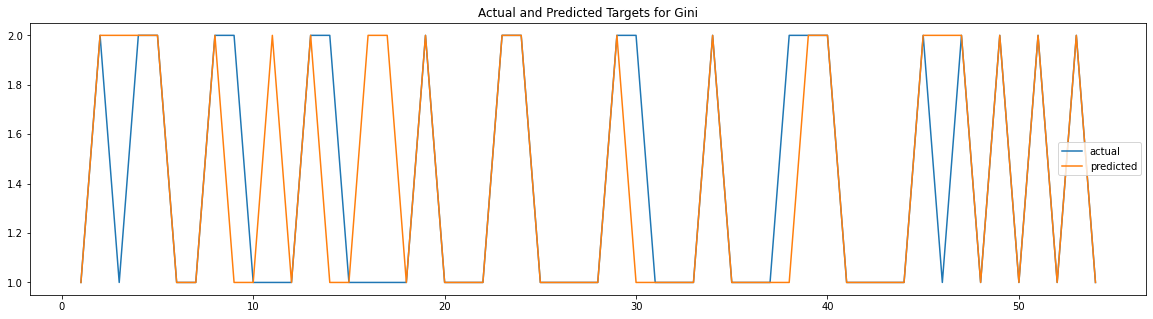

In [40]:
x = []
for i in range(len(gini_Y_test)):
    x.append(i+1)
plt.rcParams['figure.figsize'] = (20,5)
plt.title('Actual and Predicted Targets for Gini')
plt.plot(x, gini_Y_test, label='actual')
plt.plot(x, gini_Y_pred, label='predicted')
plt.legend()
plt.savefig('gini_actual_predicted.png')
plt.show()

## Post Pruning For Gini

In [41]:
gini_pruned_classifier = gini_classifier
gini_classifier = deepcopy(gini_pruned_classifier)
gini_pruned_root = gini_root
gini_root = deepcopy(gini_pruned_root)

In [42]:
gini_pruned_root = process_pruning(gini_pruned_root, gini_pruned_classifier, gini_X_train, gini_Y_train, gini_X_val, gini_Y_val, gini_acc_val)


Validation Accuracy before pruning:	0.8055555555555556


Validation Accuracy after  pruning:	0.8611111111111112



In [43]:
gini_pruned_classifier.print_tree()

thal == 3.0  (Gini Index: 0.49913)
  left: major_vessels == 0.0  (Gini Index: 0.3473)
   left: chest_pain == 1.0  (Gini Index: 0.20414)
    left: 1
   right: chest_pain == 2.0  (Gini Index: 0.18)
     left: induced_ang == 0.0  (Gini Index: 0.0)
      left: oldpeak <= 0.0  (Gini Index: 0.0)
       left: peak_st_seg == 1.0  (Gini Index: 0.0)
        left: age <= 29.0  (Gini Index: 0.0)
         left: 1
        right: age <= 42.0  (Gini Index: 0.0)
          left: 1
         right: 1
       right: 1
      right: oldpeak <= 0.2  (Gini Index: 0.0)
        left: 1
       right: oldpeak <= 0.7  (Gini Index: 0.0)
         left: 1
        right: 1
     right: 1
    right: chest_pain == 3.0  (Gini Index: 0.22853)
      left: induced_ang == 0.0  (Gini Index: 0.28733)
       left: oldpeak <= 0.0  (Gini Index: 0.33241)
        left: sex == 0.0  (Gini Index: 0.29752)
         left: age <= 37.0  (Gini Index: 0.0)
          left: 1
         right: age <= 39.0  (Gini Index: 0.0)
           left: 1
    

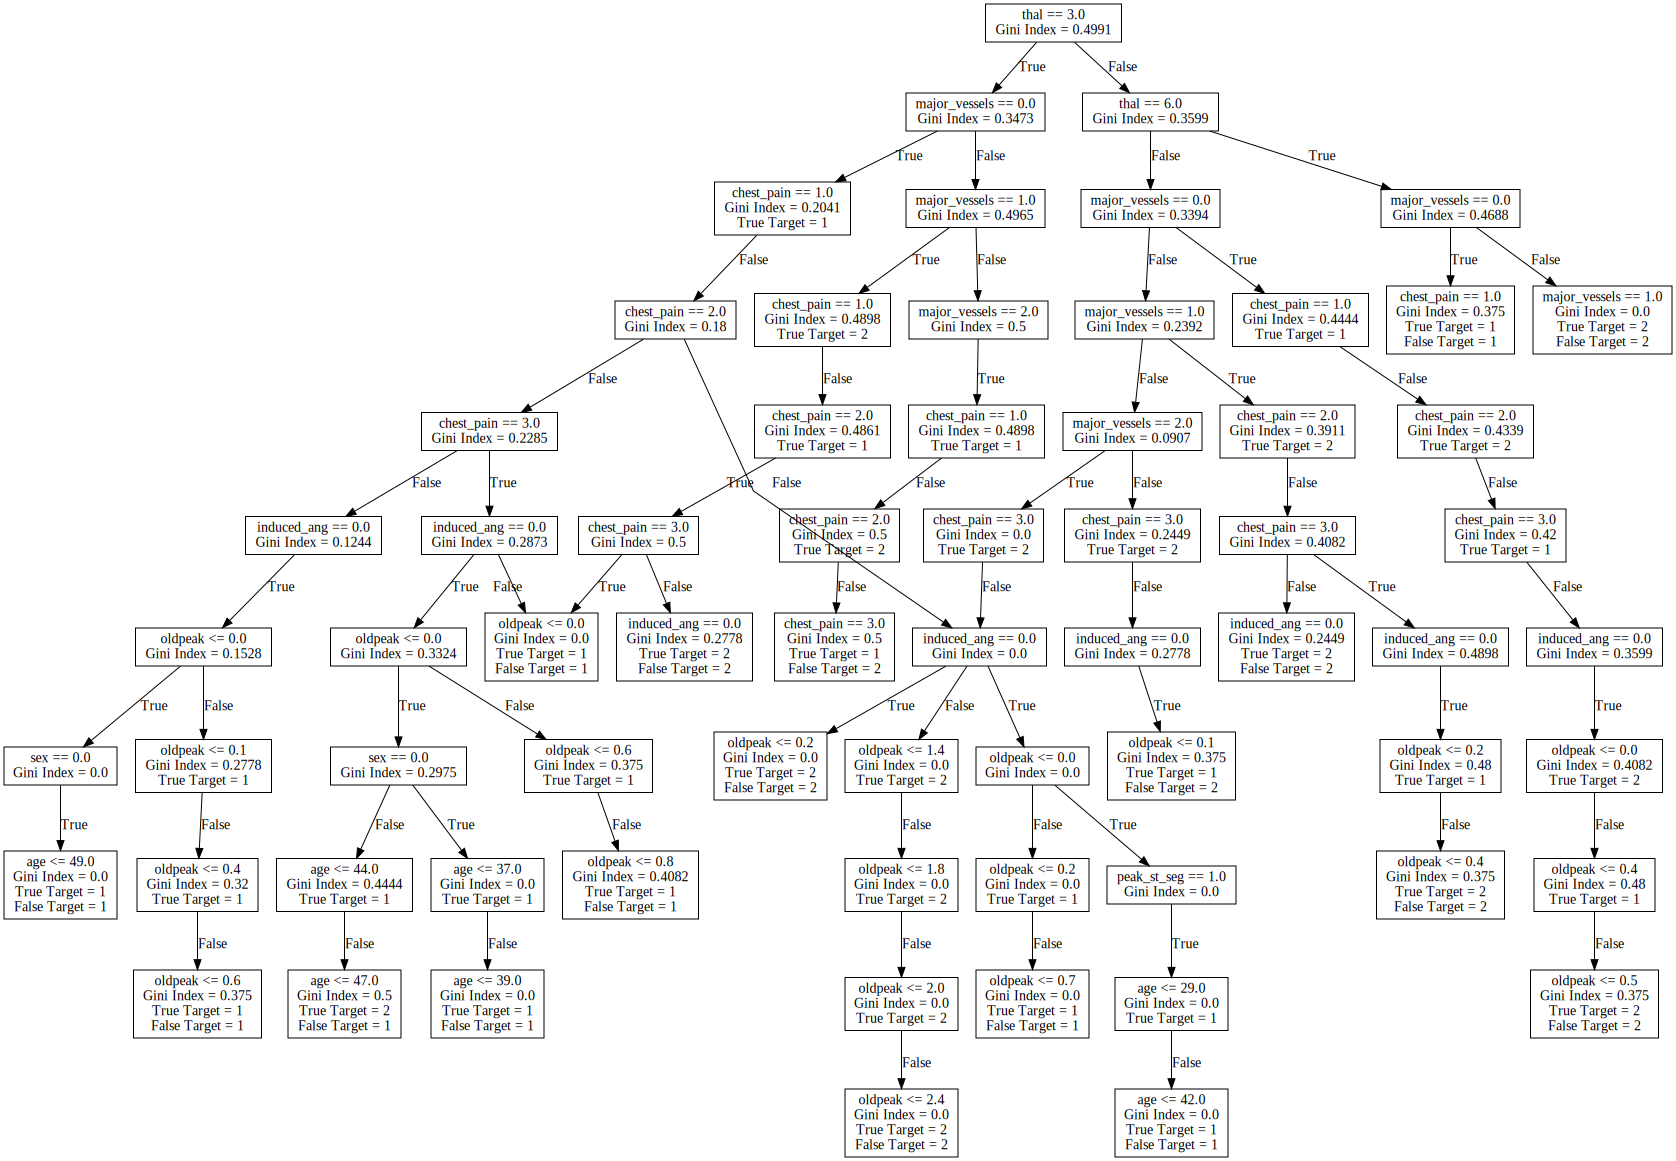

In [44]:
print_gini_pruned = print_decision_tree('gini', gini_pruned_root, 'gini_pruned_decision_tree.gv')
print_gini_pruned

In [45]:
gini_Y_pred_pruned = gini_pruned_classifier.predict(gini_X_test)
x = []
for i in range(len(gini_Y_pred_pruned)):
    x.append(i)

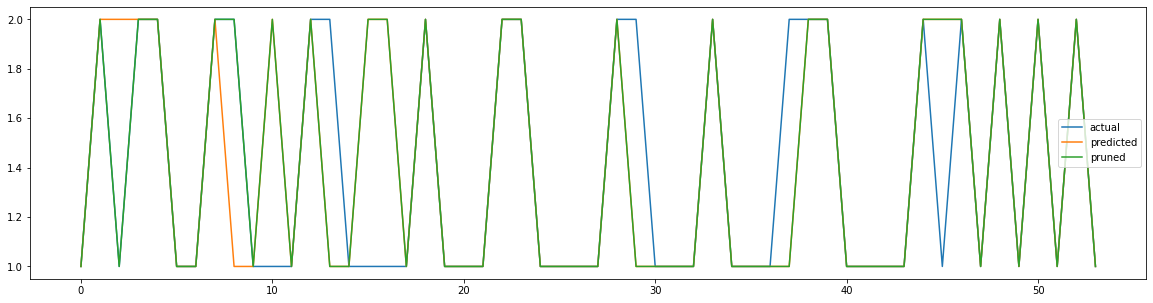

In [46]:
plt.rcParams['figure.figsize'] = (20,5)
plt.plot(x, gini_Y_test, label='actual')
plt.plot(x, gini_Y_pred, label='predicted')
plt.plot(x, gini_Y_pred_pruned, label='pruned')
plt.legend()
plt.savefig('gini_actual_predicted_pruned.png')
plt.show()

In [47]:
acc1 = accuracy_score(gini_Y_test, gini_Y_pred)
acc2 = accuracy_score(gini_Y_test, gini_Y_pred_pruned)
print(f"Test Accuracy before pruning:\t{acc1}")
print(f"Test Accuracy after  pruning:\t{acc2}")

Test Accuracy before pruning:	0.8333333333333334
Test Accuracy after  pruning:	0.8703703703703703


# Information Gain

In [70]:
find_best_depth_limit('ig')

In [71]:
ig_classifier, ig_root, ig_X_train, ig_X_val, ig_X_test, ig_Y_train, ig_Y_val, ig_Y_test, ig_Y_pred, ig_acc_val = process_building(criterion='ig', max_depth=12)


Validation Accuracy before pruning:	0.7916666666666666


   Best Test Accuracy for Information Gain:	0.8333333333333334

Average Test Accuracy for Information Gain:	0.7370370370370369




In [72]:
ig_classifier.print_tree()

major_vessels == 0.0  (Info Gain: 0.16452)
  left: oldpeak <= 2.4  (Info Gain: 0.12746)
   left: chest_pain == 4.0  (Info Gain: 0.1152)
    left: age <= 41.0  (Info Gain: 0.2201)
     left: 2
    right: serum_chol <= 243.0  (Info Gain: 0.25738)
      left: 1
     right: thal == 3.0  (Info Gain: 0.37687)
       left: age <= 59.0  (Info Gain: 0.55034)
        left: 1
       right: sex == 0.0  (Info Gain: 0.81128)
         left: 2
        right: 1
      right: 2
   right: max_heart_rate <= 159.0  (Info Gain: 0.08833)
     left: serum_chol <= 240.0  (Info Gain: 0.19427)
      left: 1
     right: resting_bp <= 124.0  (Info Gain: 0.45811)
       left: 2
      right: chest_pain == 1.0  (Info Gain: 0.59167)
        left: 2
       right: 1
    right: 1
  right: resting_bp <= 104.0  (Info Gain: 0.269)
    left: 1
   right: chest_pain == 1.0  (Info Gain: 0.28104)
     left: 2
    right: 2
 right: peak_st_seg == 1.0  (Info Gain: 0.21666)
   left: chest_pain == 4.0  (Info Gain: 0.27294)
    left: s

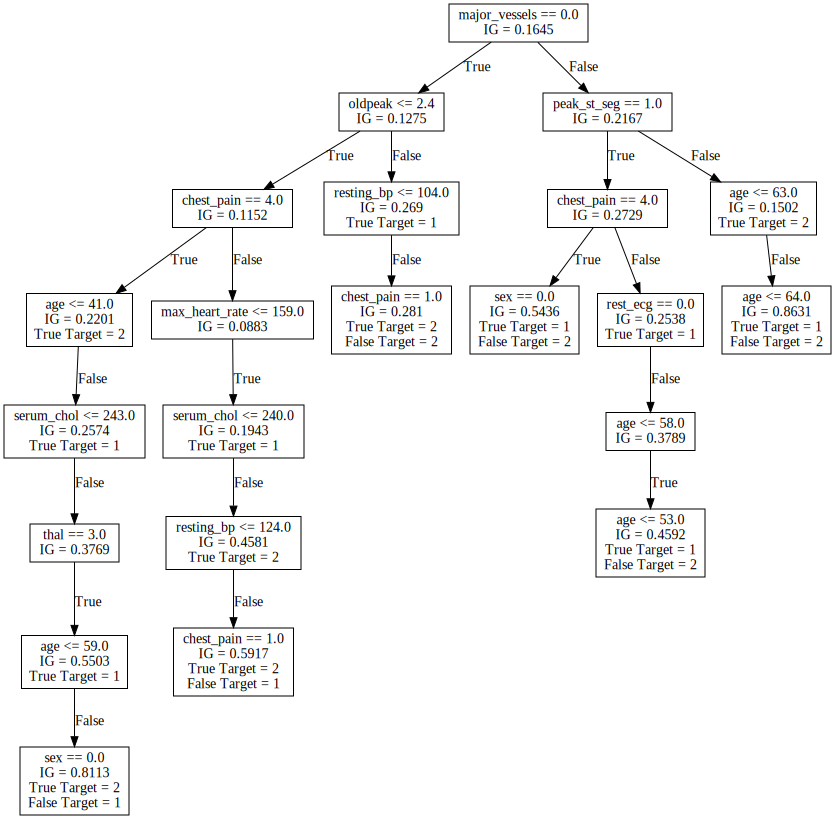

In [73]:
print_ig = print_decision_tree('ig', ig_root, 'ig_decision_tree.gv')
print_ig

In [74]:
print(f'Accuracy on test set: {accuracy_score(ig_Y_test, ig_Y_pred)}')

Accuracy on test set: 0.8333333333333334


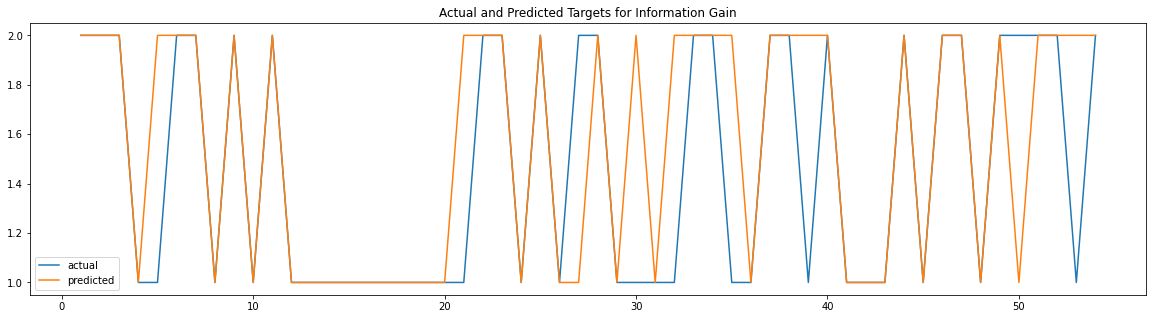

In [75]:
x = []
for i in range(len(gini_Y_test)):
    x.append(i+1)
plt.rcParams['figure.figsize'] = (20,5)
plt.title('Actual and Predicted Targets for Information Gain')
plt.plot(x, ig_Y_test, label='actual')
plt.plot(x, ig_Y_pred, label='predicted')
plt.legend()
plt.savefig('ig_actual_predicted.png')
plt.show()

## Post Pruning For Information Gain

In [76]:
ig_pruned_classifier = ig_classifier
ig_classifier = deepcopy(ig_pruned_classifier)
ig_pruned_root = ig_root
ig_root = deepcopy(ig_pruned_root)

In [77]:
ig_pruned_root = process_pruning(ig_pruned_root, ig_pruned_classifier, ig_X_train, ig_Y_train, ig_X_val, ig_Y_val, ig_acc_val)


Validation Accuracy before pruning:	0.7916666666666666


Validation Accuracy after  pruning:	0.8333333333333334



In [78]:
ig_pruned_classifier.print_tree()

major_vessels == 0.0  (Info Gain: 0.16452)
  left: oldpeak <= 2.4  (Info Gain: 0.12746)
   left: 1
  right: resting_bp <= 104.0  (Info Gain: 0.269)
    left: 1
   right: chest_pain == 1.0  (Info Gain: 0.28104)
     left: 2
    right: 2
 right: peak_st_seg == 1.0  (Info Gain: 0.21666)
   left: chest_pain == 4.0  (Info Gain: 0.27294)
    left: sex == 0.0  (Info Gain: 0.54356)
     left: 1
    right: 2
   right: rest_ecg == 0.0  (Info Gain: 0.2538)
     left: 1
    right: age <= 58.0  (Info Gain: 0.37888)
      left: age <= 53.0  (Info Gain: 0.45915)
       left: 1
      right: 2
     right: 1
  right: age <= 63.0  (Info Gain: 0.15022)
    left: 2
   right: 2


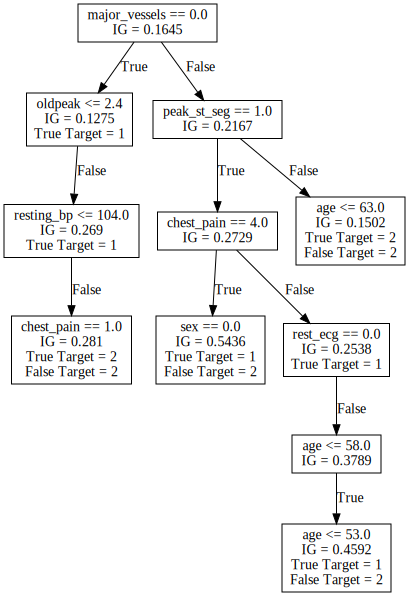

In [79]:
print_ig_pruned = print_decision_tree('ig', ig_pruned_root, 'ig_pruned_decision_tree.gv')
print_ig_pruned

In [80]:
ig_Y_pred = ig_classifier.predict(ig_X_test)
ig_Y_pred_pruned = ig_pruned_classifier.predict(ig_X_test)
x = []
for i in range(len(ig_Y_pred_pruned)):
    x.append(i)

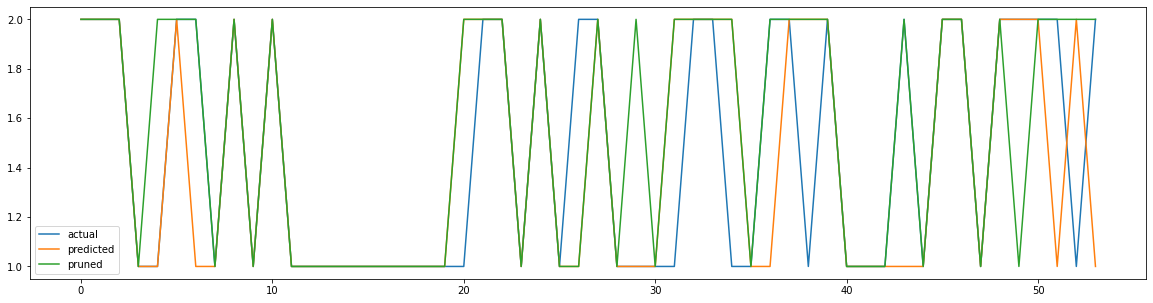

In [84]:
plt.rcParams['figure.figsize'] = (20,5)
plt.plot(x, ig_Y_test, label='actual')
plt.plot(x, ig_Y_pred, label='predicted')
plt.plot(x, ig_Y_pred_pruned, label='pruned')
plt.legend()
plt.savefig('ig_actual_predicted_pruned.png')
plt.show()

In [83]:
acc1 = accuracy_score(ig_Y_test, ig_Y_pred)
acc2 = accuracy_score(ig_Y_test, ig_Y_pred_pruned)
print(f"Test Accuracy before pruning:\t{acc1}")
print(f"Test Accuracy after  pruning:\t{acc2}")

Test Accuracy before pruning:	0.7962962962962963
Test Accuracy after  pruning:	0.8333333333333334


# Accuracy Comparison For Gini and Information Gain

In [93]:
rs = []
for i in range(10):
    rs.append(random.randint(0, 100))

gini_accuracies = []
gini_accuracies_pruned = []
ig_accuracies = []
ig_accuracies_pruned = []

for i in rs:
    X_train, X_test, Y_train, Y_test = split_train_test(0.2, i)
    
    gini_Y_pred = gini_classifier.predict(X_test)
    gini_Y_pred_pruned = gini_pruned_classifier.predict(X_test)
    gini_accuracy = accuracy_score(Y_test, gini_Y_pred)
    gini_accuracy_pruned = accuracy_score(Y_test, gini_Y_pred_pruned)
    gini_accuracies.append(gini_accuracy)
    gini_accuracies_pruned.append(gini_accuracy_pruned)

    ig_Y_pred = ig_classifier.predict(X_test)
    ig_Y_pred_pruned = ig_pruned_classifier.predict(X_test)
    ig_accuracy = accuracy_score(Y_test, ig_Y_pred)
    ig_accuracy_pruned = accuracy_score(Y_test, ig_Y_pred_pruned)
    ig_accuracies.append(ig_accuracy)
    ig_accuracies_pruned.append(ig_accuracy_pruned)

In [95]:
print("\nCriterion: GINI INDEX")
print(f"Average Accuracy over 10 random 80-20 split before pruning: {round(sum(gini_accuracies)/len(gini_accuracies), 5)}")
print(f"Average Accuracy over 10 random 80-20 split after  pruning: {round(sum(gini_accuracies_pruned)/len(gini_accuracies_pruned), 5)}")
print("\nCriterion: INFORMATION GAIN")
print(f"Average Accuracy over 10 random 80-20 split before pruning: {round(sum(ig_accuracies)/len(ig_accuracies), 5)}")
print(f"Average Accuracy over 10 random 80-20 split after  pruning: {round(sum(ig_accuracies_pruned)/len(ig_accuracies_pruned), 5)}")


Criterion: GINI INDEX
Average Accuracy over 10 random 80-20 split before pruning: 0.85741
Average Accuracy over 10 random 80-20 split after  pruning: 0.85926

Criterion: INFORMATION GAIN
Average Accuracy over 10 random 80-20 split before pruning: 0.83519
Average Accuracy over 10 random 80-20 split after  pruning: 0.88148


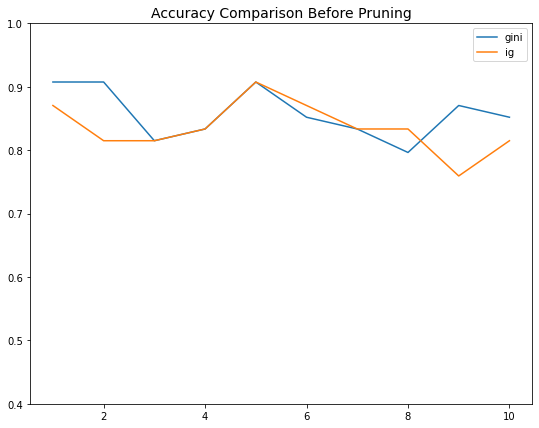

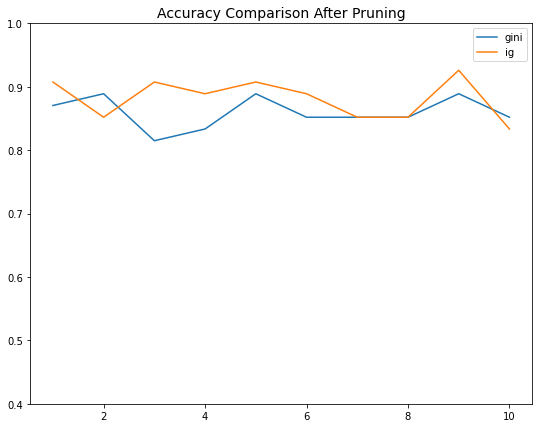

In [96]:
x = []
for i in range(len(gini_accuracies)):
    x.append(i+1)
plt.rcParams['figure.figsize'] = (9,7)
plt.title('Accuracy Comparison Before Pruning', fontsize=14)
plt.plot(x, gini_accuracies, label='gini')
plt.plot(x, ig_accuracies, label='ig')
plt.ylim([0.4,1])
plt.legend()
plt.savefig('gini_accuracy_comparison.png')
plt.show()

plt.rcParams['figure.figsize'] = (9,7)
plt.title('Accuracy Comparison After Pruning', fontsize=14)
plt.plot(x, gini_accuracies_pruned, label='gini')
plt.plot(x, ig_accuracies_pruned, label='ig')
plt.ylim([0.4,1])
plt.legend()
plt.savefig('ig_accuracy_comparison.png')
plt.show()